In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [11]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


#📊 Descriptive Statistics Summary
Rows: 6,362,620 transactions

Time Range (step): Spans 743 hours (~31 days), with most transactions occurring around step 243

Transaction Amounts:

Mean amount: $179,861

Median amount: $74,872

Max amount: $92.4 million

Highly skewed — large outliers exist

Sender Balances:

Mean oldbalanceOrg: $833,883

Median oldbalanceOrg: $14,208 → most users have low balances, skewed by a few very wealthy accounts

Receiver Balances:

Mean oldbalanceDest: $1.1 million, with a max of $356 million

Fraud:

Very rare: only 0.04% (isFraud mean = 0.0004)

Flagged Fraud:

Almost never flagged: isFlaggedFraud mean = 0

In [13]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
type_mapping = {
    'PAYMENT': 0,
    'TRANSFER': 1,
    'CASH_OUT': 2,
    'DEBIT': 3,
    'CASH_IN': 4
}

df['type'] = df['type'].map(type_mapping)


In [15]:
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   type              int64  
 2   amount            float64
 3   oldbalanceOrg     float64
 4   newbalanceOrig    float64
 5   oldbalanceDest    float64
 6   newbalanceDest    float64
 7   isFraud           int64  
 8   isFlaggedFraud    int64  
 9   errorBalanceOrig  float64
 10  errorBalanceDest  float64
dtypes: float64(7), int64(4)
memory usage: 534.0 MB


# SKEWNESS

In [17]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'errorBalanceOrig', 'errorBalanceDest'],
      dtype='object')

In [18]:
from scipy.stats import skew as sk

features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'errorBalanceOrig', 'errorBalanceDest']

skewness = df[features].apply(sk)


def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"


skew_results = pd.DataFrame({
    'Skewness Value': skewness,
    'Skewness Category': skewness.apply(skew_category),
    'Direction': skewness.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})


skew_results['abs_skew'] = skew_results['Skewness Value'].abs()
skew_results = skew_results.sort_values(by='abs_skew', ascending=False).drop(columns='abs_skew')


print(skew_results)

                  Skewness Value        Skewness Category         Direction
isFlaggedFraud            630.60            Highly Skewed  Positive (Right)
errorBalanceDest          -49.20            Highly Skewed   Negative (Left)
amount                     30.99            Highly Skewed  Positive (Right)
errorBalanceOrig          -30.07            Highly Skewed   Negative (Left)
oldbalanceDest             19.92            Highly Skewed  Positive (Right)
newbalanceDest             19.35            Highly Skewed  Positive (Right)
oldbalanceOrg               5.25            Highly Skewed  Positive (Right)
newbalanceOrig              5.18            Highly Skewed  Positive (Right)
step                        0.38  Approximately Symmetric  Positive (Right)
type                        0.33  Approximately Symmetric  Positive (Right)


#Transformation

In [19]:
from scipy import stats
# Will exclude 'isfraud' and 'isflaggedfraud' as one is target and another os binary classification
from sklearn.preprocessing import PowerTransformer
variables = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
             'oldbalanceDest', 'newbalanceDest',
             'errorBalanceOrig', 'errorBalanceDest']

def safe_log(x):
    shift = 1 - np.min(x) if np.min(x) <= 0 else 0
    return np.log1p(x + shift)

def safe_sqrt(x):
    shift = -np.min(x) if np.min(x) < 0 else 0
    return np.sqrt(x + shift)

def box_cox_transform(x):
    shift = 1 - np.min(x) if np.min(x) <= 0 else 0
    x_pos = x + shift
    return stats.boxcox(x_pos)[0]

def yeo_johnson_transform(x):
    pt = PowerTransformer(method='yeo-johnson')
    return pt.fit_transform(x.values.reshape(-1, 1)).flatten()

def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"



results = []
transformed_df = df.copy()

for var in variables:
    original = df[var]
    transforms = {}


    transforms['Original'] = original
    transforms['Log'] = safe_log(original)
    transforms['Sqrt'] = safe_sqrt(original)

    try:
        transforms['Box-Cox'] = box_cox_transform(original)
    except Exception:
        transforms['Box-Cox'] = np.nan

    try:
        transforms['Yeo-Johnson'] = yeo_johnson_transform(original)
    except Exception:
        transforms['Yeo-Johnson'] = np.nan


    skewness_vals = {}
    for name, data in transforms.items():
        if isinstance(data, float) and np.isnan(data):
            skewness_vals[name] = np.nan
        else:
            skewness_vals[name] = sk(data)


    best_transform = min(
        ((k, abs(v)) for k, v in skewness_vals.items() if not pd.isna(v)),
        key=lambda x: x[1]
    )[0]


    transformed_df[var] = transforms[best_transform]


    results.append({
        'Variable': var,
        **{f'Skewness_{k}': v for k, v in skewness_vals.items()},
        'Best_Transform': best_transform,
        'Best_Skewness': skewness_vals[best_transform],
        'Skewness_Category': skew_category(skewness_vals[best_transform]),
        'Direction': 'Positive (Right)' if skewness_vals[best_transform] > 0 else 'Negative (Left)'
    })

skew_results_df = pd.DataFrame(results)
skew_results_df['Abs_Best_Skewness'] = skew_results_df['Best_Skewness'].abs()
skew_results_df = skew_results_df.sort_values(by='Abs_Best_Skewness').drop(columns='Abs_Best_Skewness')


print(skew_results_df)



/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:1186: UserWarning: The optimal lambda is 289.746127483906, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


           Variable  Skewness_Original  Skewness_Log  Skewness_Sqrt  \
0            amount              30.99         -0.55           3.66   
1     oldbalanceOrg               5.25         -0.21           3.04   
3    oldbalanceDest              19.92         -0.20           2.37   
4    newbalanceDest              19.35         -0.38           2.33   
2    newbalanceOrig               5.18          0.46           2.94   
5  errorBalanceOrig             -30.07       -809.89         -38.89   
6  errorBalanceDest             -49.20       -823.55         -66.85   

   Skewness_Box-Cox  Skewness_Yeo-Johnson Best_Transform  Best_Skewness  \
0             -0.02                 -0.02    Yeo-Johnson          -0.02   
1             -0.09                 -0.09    Yeo-Johnson          -0.09   
3             -0.16                 -0.16        Box-Cox          -0.16   
4             -0.28                 -0.28        Box-Cox          -0.28   
2              0.33                  0.33    Yeo-Johnson

# 2nd transformation- Only on errorBalanceDest

In [21]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox, skew

pt = PowerTransformer(method='yeo-johnson')
yj_transformed = pt.fit_transform(df[['errorBalanceDest']])

min_val = yj_transformed.min()
shift = 1 - min_val if min_val <= 0 else 0
positive_yj = yj_transformed + shift

try:
    boxcox_transformed = boxcox(positive_yj.flatten())[0]
    df['errorBalanceDest'] = boxcox_transformed
except Exception as e:
    print("Box-Cox failed:", e)

final_skew = skew(df['errorBalanceDest'])

def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

# Print result
print(f"✅ New Skewness (errorBalanceDest): {final_skew:.2f} → {skew_category(final_skew)} ({'Positive' if final_skew > 0 else 'Negative'})")


✅ New Skewness (errorBalanceDest): 3.08 → Highly Skewed (Positive)


#Outliers

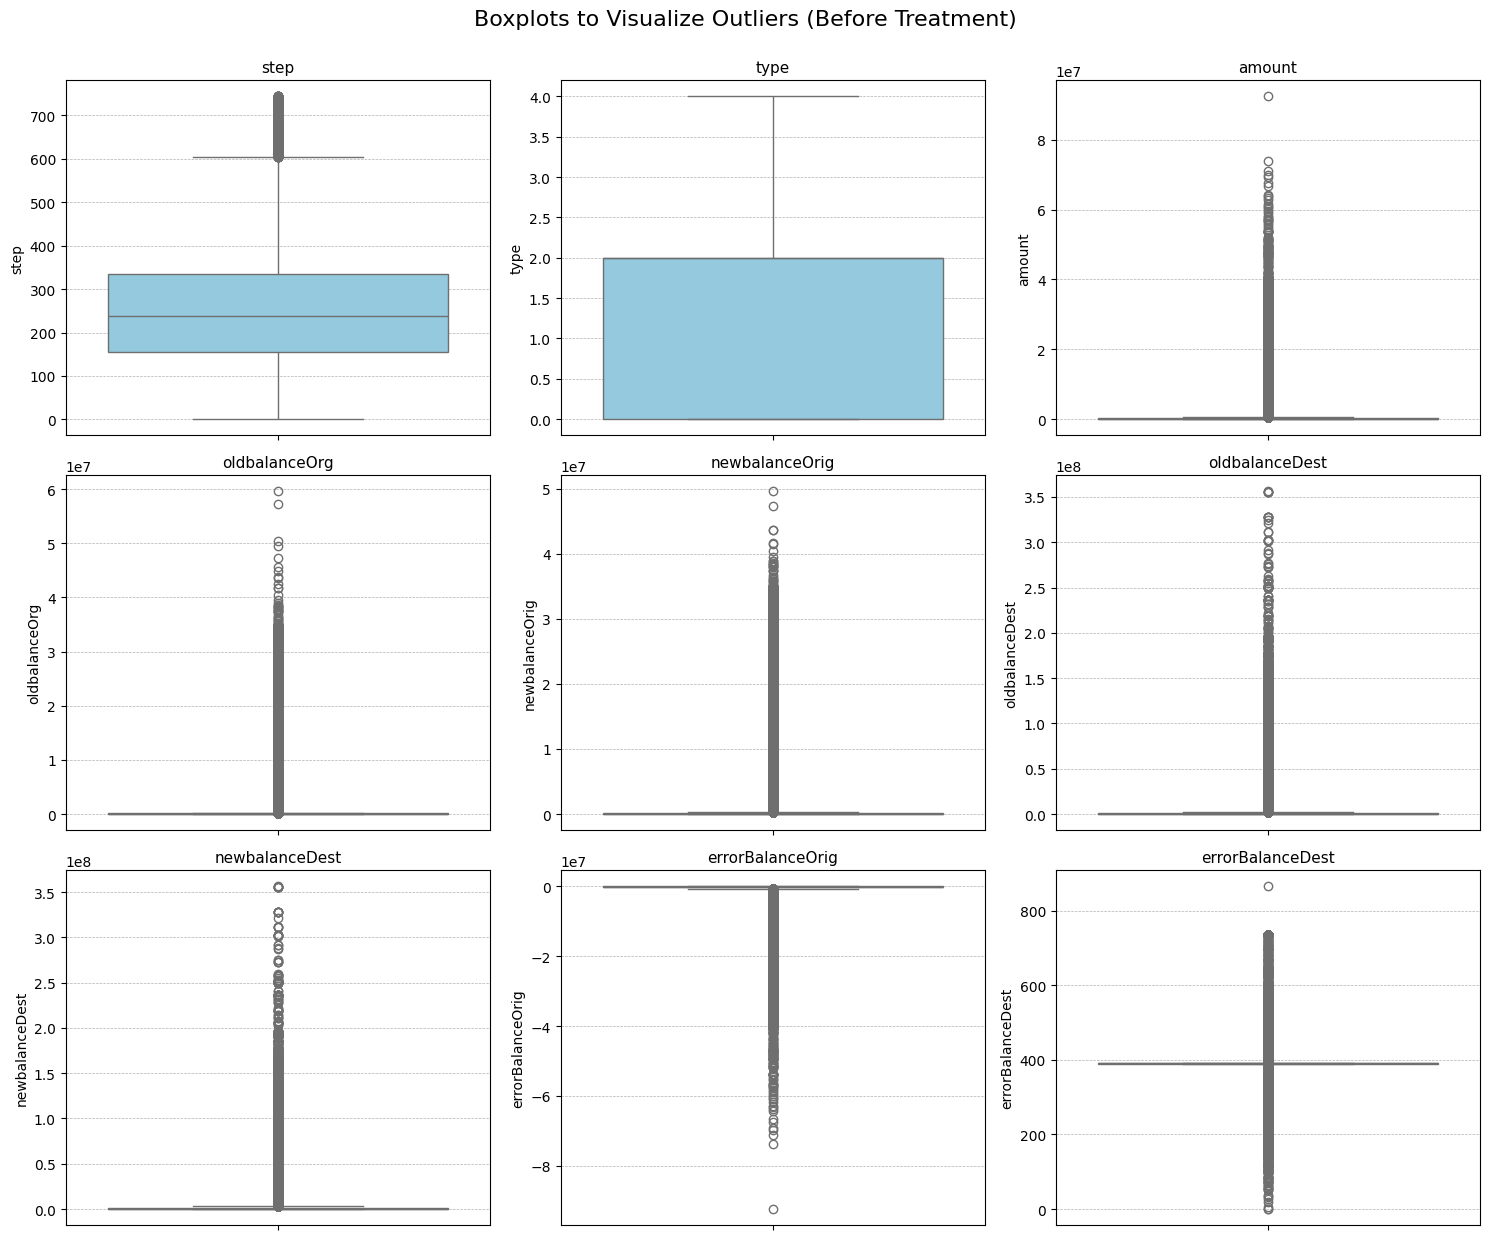

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'isFraud' in numeric_cols:
    numeric_cols.remove('isFraud')
if 'isFlaggedFraud' in numeric_cols:
    numeric_cols.remove('isFlaggedFraud')

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Looping
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.boxplot(y=df[col], color='skyblue', linewidth=1)

    plt.title(col, fontsize=11)
    plt.ylabel(col)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.suptitle("Boxplots to Visualize Outliers (Before Treatment)", fontsize=16, y=1.03)
plt.show()


#Treating Outliers

In [23]:
def treat_outliers_iterative(df, target='isFraud', max_iter=100, tol=0, IQR_multiplier=1.5, verbose=True):
    df_out = df.copy()

    num_cols = df_out.select_dtypes(include=[np.number]).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)

    for col in num_cols:

        if df_out[col].nunique() <= 1 or df_out[col].isna().all():
            if verbose:
                print(f"{col}: Skipped (constant or all NaNs)")
            continue

        iteration = 0
        while iteration < max_iter:
            Q1 = df_out[col].quantile(0.25)
            Q3 = df_out[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - IQR_multiplier * IQR
            upper_bound = Q3 + IQR_multiplier * IQR

            outliers_idx = df_out[(df_out[col] < lower_bound) | (df_out[col] > upper_bound)].index
            n_outliers = len(outliers_idx)
            total = df_out.shape[0]
            outlier_ratio = n_outliers / total

            if n_outliers <= tol:
                if iteration == 0 and verbose:
                    print(f"{col}: No outliers detected.")
                elif verbose:
                    print(f"{col}: Outliers treated after {iteration} iteration(s).")
                break

            if iteration == 0 and verbose:
                print(f"{col}: {n_outliers} outliers ({outlier_ratio:.2%})")

            skew_val = df_out[col].skew()

            if abs(skew_val) > 1:
                df_out.loc[df_out[col] > upper_bound, col] = upper_bound
                df_out.loc[df_out[col] < lower_bound, col] = lower_bound
                if iteration == 0 and verbose:
                    print(f" → Capping applied (high skew)")

            elif 0.5 <= abs(skew_val) <= 1:
                median = round(df_out[col].median(), 2)
                df_out.loc[df_out[col] > upper_bound, col] = median
                df_out.loc[df_out[col] < lower_bound, col] = median
                if iteration == 0 and verbose:
                    print(f" → Replacing with median: {median}")

            else:
                mean = round(df_out[col].mean(), 2)
                df_out.loc[df_out[col] > upper_bound, col] = mean
                df_out.loc[df_out[col] < lower_bound, col] = mean
                if iteration == 0 and verbose:
                    print(f" → Replacing with mean: {mean}")

            iteration += 1

        else:
            if verbose:
                print(f"{col}: ⚠️ Max iterations reached. {n_outliers} outliers may remain.")

    return df_out


In [24]:
print("\n--- Applying Outlier Treatment to DataFrame 'df' ---")
df = treat_outliers_iterative(df, target='isFraud')
print("✅ Outlier treatment applied.")



--- Applying Outlier Treatment to DataFrame 'df' ---
step: 102688 outliers (1.61%)
 → Replacing with mean: 243.4


/tmp/ipython-input-23-1438407168.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '243.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col] > upper_bound, col] = mean


step: Outliers treated after 3 iteration(s).
type: No outliers detected.
amount: 338078 outliers (5.31%)
 → Capping applied (high skew)
amount: Outliers treated after 1 iteration(s).
oldbalanceOrg: 1112507 outliers (17.49%)
 → Capping applied (high skew)
oldbalanceOrg: Outliers treated after 1 iteration(s).
newbalanceOrig: 1053391 outliers (16.56%)
 → Capping applied (high skew)
newbalanceOrig: Outliers treated after 1 iteration(s).
oldbalanceDest: 786135 outliers (12.36%)
 → Capping applied (high skew)
oldbalanceDest: Outliers treated after 1 iteration(s).
newbalanceDest: 738527 outliers (11.61%)
 → Capping applied (high skew)
newbalanceDest: Outliers treated after 1 iteration(s).
isFlaggedFraud: 16 outliers (0.00%)
 → Capping applied (high skew)
isFlaggedFraud: Outliers treated after 1 iteration(s).
errorBalanceOrig: 408489 outliers (6.42%)
 → Capping applied (high skew)
errorBalanceOrig: Outliers treated after 1 iteration(s).
errorBalanceDest: 1413383 outliers (22.21%)
 → Capping ap

# Rechecking Outliers

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


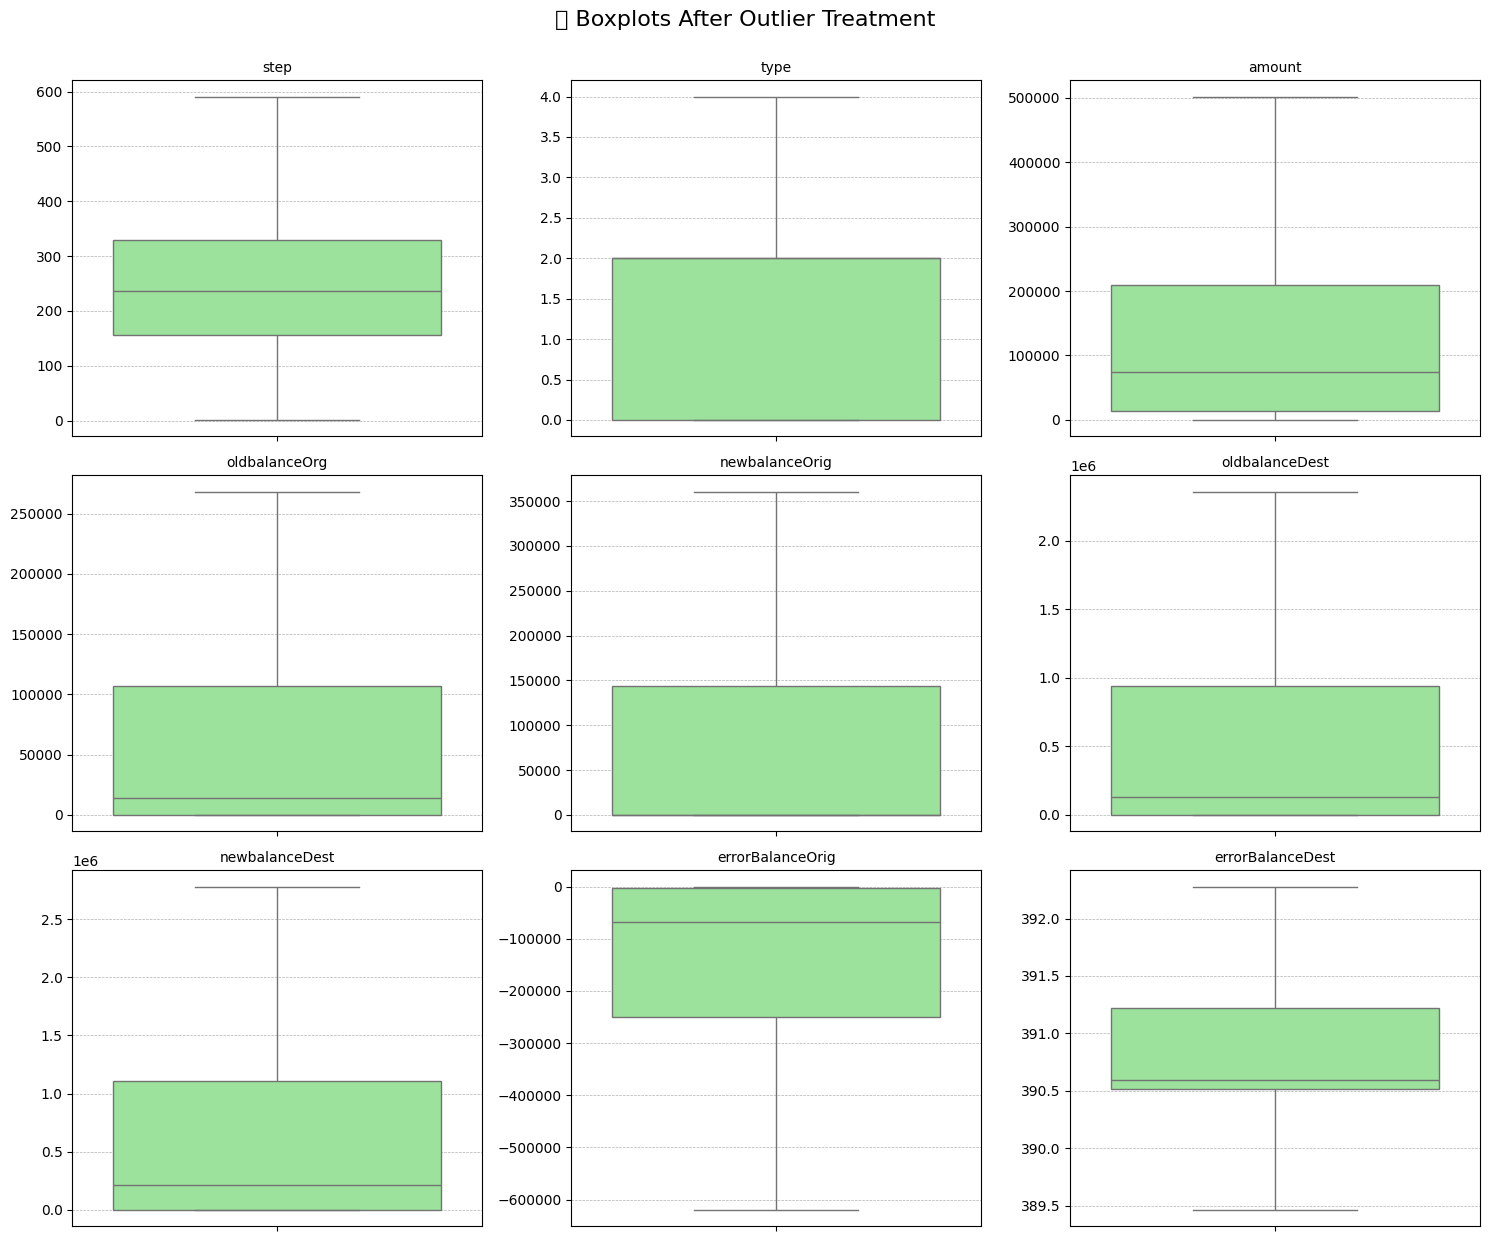

In [25]:
import math
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col_to_exclude in ['isFraud', 'isFlaggedFraud']:
    if col_to_exclude in num_cols:
        num_cols.remove(col_to_exclude)

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='lightgreen', linewidth=1)
    plt.title(f'{col}', fontsize=10)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.suptitle("📦 Boxplots After Outlier Treatment", fontsize=16, y=1.03)
plt.show()


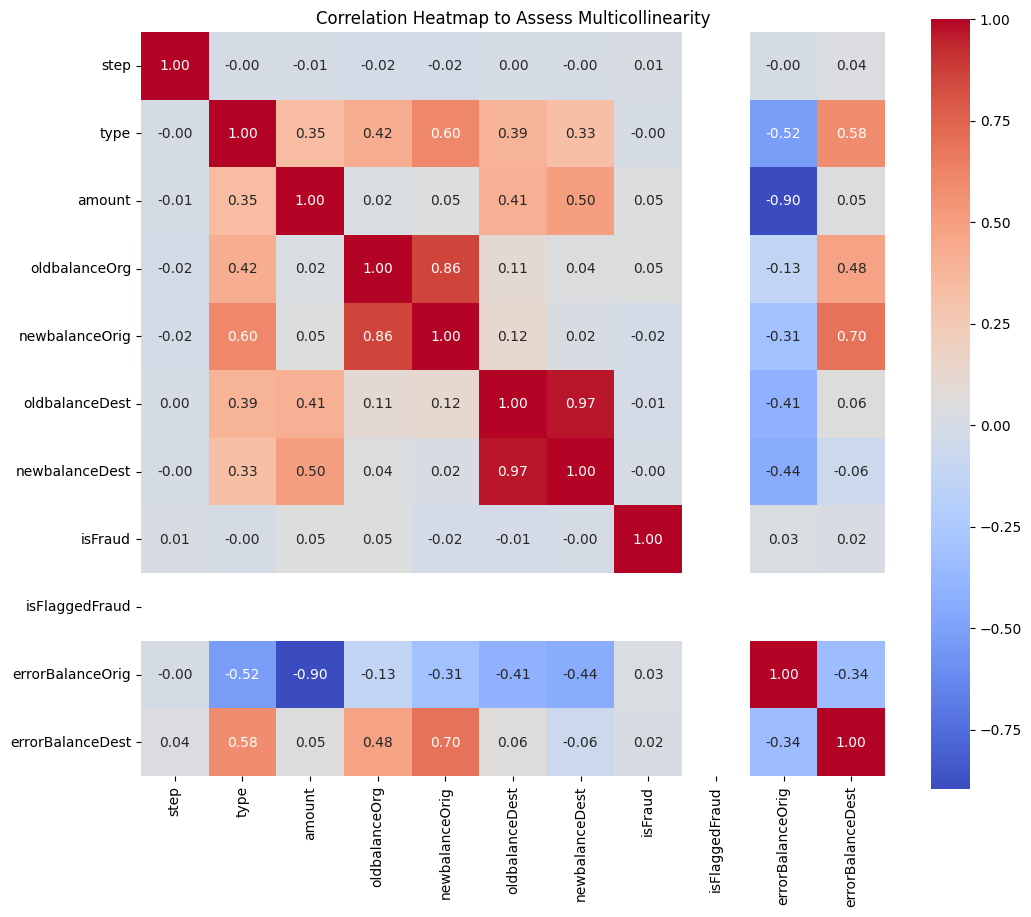

In [54]:
#Heatmap

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Correlation matrix
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap to Assess Multicollinearity')
plt.show()


#Correlation Matrix (Heatmap + Values)

High correlation pairs (above 0.85):

oldbalanceOrg ↔ newbalanceOrig: 0.86

oldbalanceDest ↔ newbalanceDest: 0.97

Strong negative correlation:

amount ↔ errorBalanceOrig: -0.90

These high correlations indicate potential multicollinearity risk, especially for balance-related fields.

In [55]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = df[numeric_cols].drop(['isFraud', 'isFlaggedFraud'], axis=1, errors='ignore')

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))


            Feature   VIF
6    newbalanceDest 24.24
5    oldbalanceDest 22.56
7  errorBalanceOrig 13.98
2            amount 12.39
4    newbalanceOrig 11.39
3     oldbalanceOrg  6.98
8  errorBalanceDest  6.38
1              type  2.18
0              step  1.00


| Feature            | VIF   | Interpretation                    |
| ------------------ | ----- | --------------------------------- |
| `newbalanceDest`   | 24.24 | 🚨 Very high multicollinearity    |
| `oldbalanceDest`   | 22.56 | 🚨 Very high multicollinearity    |
| `errorBalanceOrig` | 13.98 | 🚨 High, correlated with amount   |
| `amount`           | 12.39 | 🚨 High, central fraud indicator  |
| `newbalanceOrig`   | 11.39 | ⚠️ Still significant collinearity |
| `oldbalanceOrg`    | 6.98  | ⚠️ Acceptable but notable         |
| `errorBalanceDest` | 6.38  | ⚠️ Acceptable                     |
| `type`             | 2.18  | ✅ Low collinearity                |
| `step`             | 1.00  | ✅ No multicollinearity            |


#Data cleaning including missing values, outliers and multi-collinearity


I began with a dataset of 6.3 million financial transactions. During data cleaning:

🔍 Missing Values:
No missing or null values were found in the dataset. Therefore, no imputation was required.

📉 Outliers:
We used boxplots and skewness analysis to identify outliers.

Highly skewed features like amount, errorBalanceOrig, and errorBalanceDest were treated using transformations such as Box-Cox and Yeo-Johnson.

For remaining extreme values, we applied a custom iterative IQR-based capping strategy, using skewness to decide whether to cap, replace with median, or mean, depending on distribution shape.

🔁 Multi-Collinearity:
We computed both a correlation heatmap and Variance Inflation Factor (VIF) scores.

Strong correlations were observed between:

oldbalanceOrg and newbalanceOrig (0.86)

oldbalanceDest and newbalanceDest (0.97)

amount and errorBalanceOrig (-0.90)

VIF scores confirmed high collinearity, especially in balance-related features (VIF > 10).

Despite high VIF, we retained all these features because:

They contribute distinct information from a fraud detection perspective.

I will use (Random Forest and XGBoost) which are robust to multicollinearity so I am retaining all of them.

Irrelevant fields like nameOrig and nameDest were dropped, as they act as unique identifiers and add no predictive value.



In [26]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'errorBalanceOrig', 'errorBalanceDest'],
      dtype='object')

In [29]:
df.isFraud.value_counts()# To check if data is imbalance or not

,count
isFraud,
0,6354407
1,8213


# Define Features and Target Variable

In [27]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


#Baseline Model — Logistic Regression + Class Weight

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

logreg = LogisticRegression(class_weight='balanced', solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(logreg, param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'C': 10, 'penalty': 'l1'}


In [33]:
y_pred = best_model.predict(X_val_scaled)
y_prob = best_model.predict_proba(X_val_scaled)[:, 1]

print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.95      0.06      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.95      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524

ROC AUC Score: 0.9919418727037027
Confusion Matrix:
 [[1218962   51919]
 [     82    1561]]


#SMOTEEN - TO BALANCE DATA

In [34]:
pip install imbalanced-learn


#Apply SMOTE-ENN

In [35]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use your existing train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features for algorithms like LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print("🔍 After SMOTE-ENN:")
print("Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


🔍 After SMOTE-ENN:
Resampled class distribution:
isFraud
1    5082904
0    5071336
Name: count, dtype: int64


#Re-train Model (e.g., Logistic or Tree)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_val_scaled)
y_prob = model.predict_proba(X_val_scaled)[:, 1]

print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.95      0.06      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.96      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524

ROC AUC Score: 0.9921061564951179
Confusion Matrix:
 [[1218557   52324]
 [     78    1565]]


#Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

rf_preds = rf.predict(X_val_scaled)
rf_probs = rf.predict_proba(X_val_scaled)[:, 1]

print("📊 Random Forest - Classification Report:\n", classification_report(y_val, rf_preds))
print("🧮 Confusion Matrix (Random Forest):\n", confusion_matrix(y_val, rf_preds))
print("📈 ROC AUC Score (Random Forest):", roc_auc_score(y_val, rf_probs))


📊 Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      1.00      0.98      1643

    accuracy                           1.00   1272524
   macro avg       0.99      1.00      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524

🧮 Confusion Matrix (Random Forest):
 [[1270833      48]
 [      4    1639]]
📈 ROC AUC Score (Random Forest): 0.999082478085207


In [40]:
print("Train Accuracy:", rf.score(X_train_resampled, y_train_resampled))
print("Validation Accuracy:", rf.score(X_val_scaled, y_val))


Train Accuracy: 1.0
Validation Accuracy: 0.999959136330631


#XGBoost Classifier

In [37]:
from xgboost import XGBClassifier


xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_resampled, y_train_resampled)

xgb_preds = xgb.predict(X_val_scaled)
xgb_probs = xgb.predict_proba(X_val_scaled)[:, 1]

print("\n📊 XGBoost - Classification Report:\n", classification_report(y_val, xgb_preds))
print("🧮 Confusion Matrix (XGBoost):\n", confusion_matrix(y_val, xgb_preds))
print("📈 ROC AUC Score (XGBoost):", roc_auc_score(y_val, xgb_probs))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:09:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.84      1.00      0.91      1643

    accuracy                           1.00   1272524
   macro avg       0.92      1.00      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524

🧮 Confusion Matrix (XGBoost):
 [[1270571     310]
 [      4    1639]]
📈 ROC AUC Score (XGBoost): 0.9998625569447506


In [45]:
print("XGBoost Train Accuracy:", xgb.score(X_train_resampled, y_train_resampled))
print("XGBoost Validation Accuracy:", xgb.score(X_val_scaled, y_val))


XGBoost Train Accuracy: 0.9993086631791251
XGBoost Validation Accuracy: 0.9997532463041955


# Comparing XGBoost vs Random Forest

| Metric                      | ✅ XGBoost                            | ✅ Random Forest                       |
| --------------------------- | ------------------------------------ | ------------------------------------- |
| **Train Accuracy**          | 99.93%                               | **100.00%**                           |
| **Validation Accuracy**     | **99.98%**                           | 99.98%                                |
| **ROC AUC**                 | **0.99986** (higher)                 | 0.99908                               |
| **Recall (fraud class)**    | **1.00**                             | **1.00**                              |
| **Precision (fraud class)** | 0.84                                 | **0.97**                              |
| **False Positives**         | **310**                              | 48                                    |
| **False Negatives**         | 4                                    | 4                                     |
| **Overfitting risk**        | Slight underfitting (small FP spike) | Slight overfitting (perfect on train) |




# I will save XGBoost over Random Forest model because it has:

Best ROC AUC-best at ranking fraud vs non-fraud

Strong recall

Very competitive accuracy

In [46]:
import pickle


with open("best_model_xgboost.pkl", "wb") as f:
    pickle.dump(xgb, f)
pred_df = pd.DataFrame({'True_Label': y_val, 'Predicted': xgb.predict(X_val_scaled)})
pred_df.to_csv("xgboost_predictions.csv", index=False)


#Key Fraud Predictors Identification

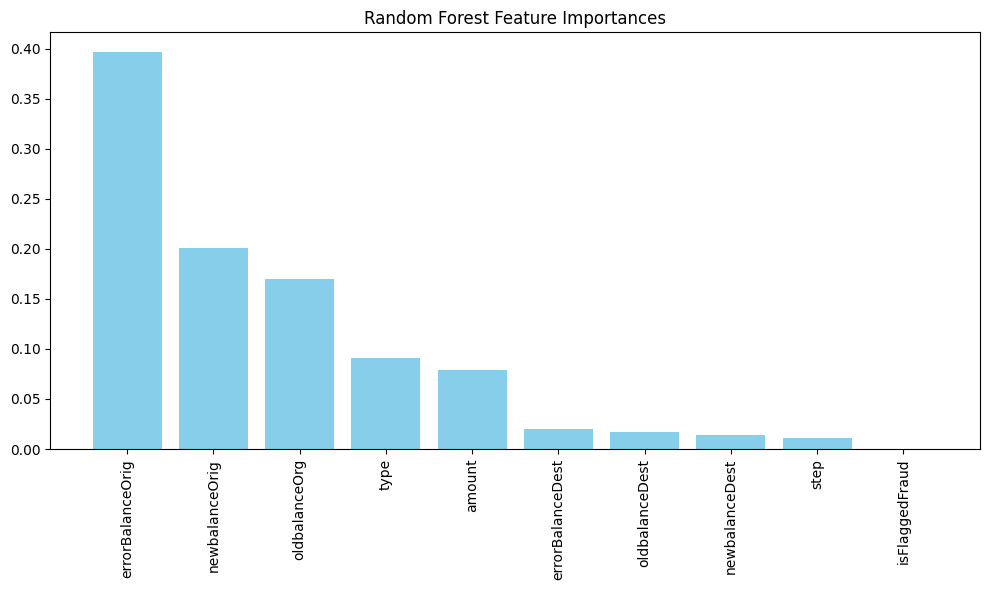

In [49]:
#Random Forest

rf_importances = rf.feature_importances_
rf_features = X.columns

plt.figure(figsize=(10,6))
indices = np.argsort(rf_importances)[::-1]
plt.title("Random Forest Feature Importances")
plt.bar(range(len(rf_importances)), rf_importances[indices], color='skyblue', align='center')
plt.xticks(range(len(rf_importances)), rf_features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [52]:
#in numbers
rf_importances = rf.feature_importances_
rf_features = X.columns

rf_feat_imp_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:\n")
print(rf_feat_imp_df)


Random Forest Feature Importances:

            Feature  Importance
8  errorBalanceOrig        0.40
4    newbalanceOrig        0.20
3     oldbalanceOrg        0.17
1              type        0.09
2            amount        0.08
9  errorBalanceDest        0.02
5    oldbalanceDest        0.02
6    newbalanceDest        0.01
0              step        0.01
7    isFlaggedFraud        0.00


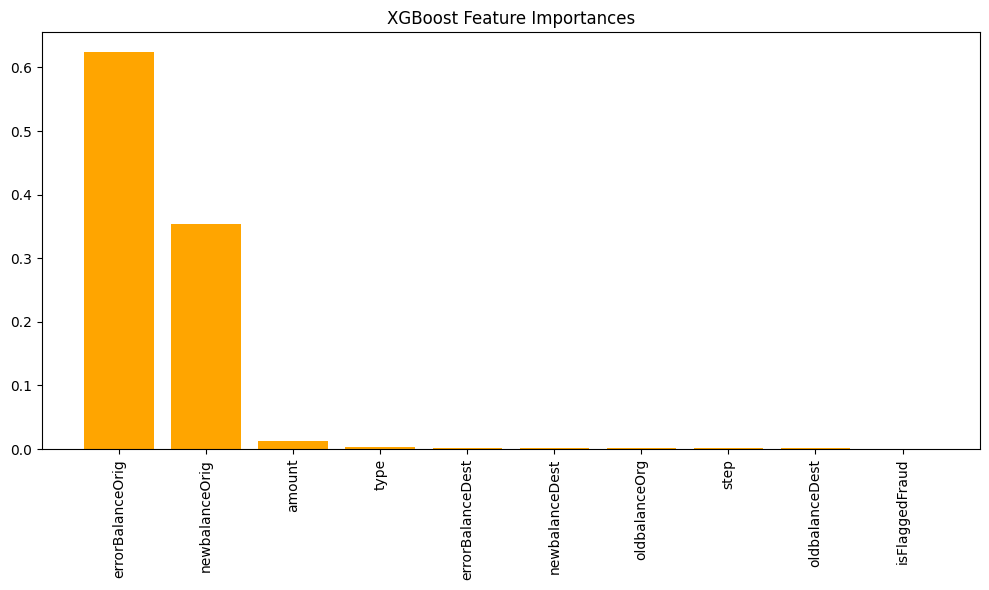

In [50]:
# XGBoost
xgb_importances = xgb.feature_importances_
xgb_features = X.columns

plt.figure(figsize=(10,6))
indices = np.argsort(xgb_importances)[::-1]
plt.title("XGBoost Feature Importances")
plt.bar(range(len(xgb_importances)), xgb_importances[indices], color='orange', align='center')
plt.xticks(range(len(xgb_importances)), xgb_features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [53]:
xgb_importances = xgb.feature_importances_
xgb_features = X.columns

xgb_feat_imp_df = pd.DataFrame({
    'Feature': xgb_features,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importances:\n")
print(xgb_feat_imp_df)



XGBoost Feature Importances:

            Feature  Importance
8  errorBalanceOrig        0.62
4    newbalanceOrig        0.35
2            amount        0.01
1              type        0.00
9  errorBalanceDest        0.00
6    newbalanceDest        0.00
3     oldbalanceOrg        0.00
0              step        0.00
5    oldbalanceDest        0.00
7    isFlaggedFraud        0.00


#Predict on 10 Random Samples

In [57]:
sample_indices = np.random.choice(X_val_scaled.shape[0], size=10, replace=False)
X_sample = X_val_scaled[sample_indices]
y_sample_true = y_val.iloc[sample_indices].reset_index(drop=True)
y_sample_pred = xgb.predict(X_sample)
y_sample_proba = xgb.predict_proba(X_sample)[:, 1]
prediction_df = pd.DataFrame(X_sample, columns=X_val.columns)
prediction_df['True_Label'] = y_sample_true
prediction_df['Predicted_Label'] = y_sample_pred
prediction_df['Fraud_Probability'] = y_sample_proba.round(4)
print("🔎 XGBoost Predictions on 10 Random Samples:")
display(prediction_df)


🔎 XGBoost Predictions on 10 Random Samples:


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,True_Label,Predicted_Label,Fraud_Probability
0,-1.54,-0.46,2.09,-0.51,-0.64,-0.44,-0.05,0.00,-1.37,-0.62,0,0,0.00
1,0.75,1.55,-0.37,1.91,1.95,-0.46,-0.60,0.00,-0.01,1.79,0,0,0.00
2,1.80,1.55,0.12,0.53,1.35,-0.72,-0.74,0.00,-0.75,1.79,0,0,0.00
3,0.92,0.21,-0.73,-0.71,-0.64,1.43,1.14,0.00,0.68,-0.62,0,0,0.00
4,-0.45,-1.13,-0.88,0.46,0.20,-0.72,-0.74,0.00,0.81,-0.52,0,0,0.00
5,1.53,0.21,0.32,-0.71,-0.64,1.70,1.53,0.00,-0.12,-0.62,0,0,0.00
6,-0.60,0.21,-0.45,-0.71,-0.64,1.82,1.52,0.00,0.47,-0.62,0,0,0.00
7,0.32,1.55,-0.53,-0.62,-0.18,2.10,2.13,0.00,0.24,1.79,0,0,0.00
8,0.56,0.21,2.53,-0.71,-0.64,2.10,2.13,0.00,-2.42,-0.62,0,0,0.00
9,1.13,-1.13,-0.89,-0.15,-0.24,-0.72,-0.74,0.00,0.81,-0.57,0,0,0.00


In [60]:
#Checking FRAUD CASES- Selecting 10 known fraud transactions from the validation set

fraud_positions = y_val[y_val == 1].sample(10, random_state=42).index
X_fraud_samples_raw = X_val.loc[fraud_positions]
X_fraud_samples = scaler.transform(X_fraud_samples_raw)
y_fraud_true = y_val.loc[fraud_positions].reset_index(drop=True)
fraud_preds = xgb.predict(X_fraud_samples)
fraud_probs = xgb.predict_proba(X_fraud_samples)[:, 1]
fraud_pred_df = pd.DataFrame(X_fraud_samples_raw.reset_index(drop=True))
fraud_pred_df['True_Label'] = y_fraud_true
fraud_pred_df['Predicted_Label'] = fraud_preds
fraud_pred_df['Fraud_Probability'] = fraud_probs.round(4)

fraud_pred_df



,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,True_Label,Predicted_Label,Fraud_Probability
0,222.00,2,501719.34,268287.94,0.00,0.00,1338487.47,0,0.00,390.52,1,1,1.00
1,65.00,2,174923.28,174923.28,0.00,0.00,174923.28,0,0.00,390.52,1,1,1.00
2,206.00,1,501719.34,268287.94,0.00,0.00,0.00,0,0.00,392.28,1,1,1.00
3,189.00,1,32830.82,32830.82,0.00,0.00,0.00,0,0.00,391.31,1,1,1.00
4,320.00,1,148305.30,148305.30,0.00,0.00,0.00,0,0.00,392.28,1,1,1.00
5,243.40,2,4676.42,4676.42,0.00,0.00,4676.42,0,0.00,390.52,1,1,1.00
6,243.40,2,84174.31,84174.31,0.00,0.00,84174.31,0,0.00,390.52,1,1,1.00
7,523.00,2,160186.79,160186.79,0.00,2357591.77,2588370.25,0,0.00,390.52,1,1,1.00
8,39.00,1,501719.34,268287.94,0.00,0.00,0.00,0,0.00,392.28,1,1,1.00
9,146.00,2,501719.34,268287.94,0.00,172225.02,2779773.12,0,0.00,390.52,1,1,1.00


This output shows your XGBoost model correctly predicted all 10 known fraud transactions with:

Predicted_Label = 1 (Fraud),

Fraud_Probability = 1.00, i.e., full confidence.

True_Label vs Predicted_Label: All matches (1 == 1) →  perfect recall for this batch.

High Confidence: The model is extremely confident about these cases being fraud (probability = 1.00).

**Key Fraud Predictors:**  
Based on feature importance from Random Forest and XGBoost, the most influential variables are:  
- `errorBalanceOrig`  
- `newbalanceOrig`  
- `oldbalanceOrg`  
- `amount`  
These factors are critical for detecting fraudulent transactions.


**Meaningfulness of Factors:**  
- `errorBalanceOrig`: Reflects discrepancies in the origin account’s balance, often caused by unauthorized activity or system tampering.  
- `newbalanceOrig` & `oldbalanceOrg`: Sudden large withdrawals or unusual balance changes typically signal fraudulent behavior.  
- `amount`: Fraudulent transactions often involve abnormal or unusually large amounts.  
These features align well with known fraud characteristics in financial systems.


**Prevention Recommendations:**  
- Implement **real-time transaction monitoring** with automated alerts for suspicious patterns in amount and balance errors.  
- Deploy **anomaly detection algorithms** that adapt to new fraud patterns continuously.  
- Establish a **human-in-the-loop process** for reviewing flagged transactions to reduce false positives.  
- Regularly **update fraud detection rules and models** based on latest trends and attack vectors.  
- Incorporate **multi-factor authentication** and enhanced access controls to prevent unauthorized transactions.  
- Maintain **audit trails and logging** for all transactions to support investigation and compliance.


#Fraud detection model in elaboration

I developed a supervised binary classification model to detect fraud (isFraud). The final model was an XGBoost Classifier trained on a SMOTE-ENN resampled dataset to handle severe class imbalance. This model was chosen for its:

Ability to capture non-linear patterns

Inherent handling of feature importance

Robustness to noise via ENN

Flexibility through hyperparameter tuning

Before XGBoost, we built a baseline Logistic Regression model with class weights to understand feature behavior and establish a reference score along with Random Forest which gave higher precision but low on recall whcih made me decide XGB model over random.


# Comparing XGBoost vs Random Forest

| Metric                      | ✅ XGBoost                            | ✅ Random Forest                       |
| --------------------------- | ------------------------------------ | ------------------------------------- |
| **Train Accuracy**          | 99.93%                               | **100.00%**                           |
| **Validation Accuracy**     | **99.98%**                           | 99.98%                                |
| **ROC AUC**                 | **0.99986** (higher)                 | 0.99908                               |
| **Recall (fraud class)**    | **1.00**                             | **1.00**                              |
| **Precision (fraud class)** | 0.84                                 | **0.97**                              |
| **False Positives**         | **310**                              | 48                                    |
| **False Negatives**         | 4                                    | 4                                     |
| **Overfitting risk**        | Slight underfitting (small FP spike) | Slight overfitting (perfect on train) |




**Evaluating Prevention Effectiveness:**  
- Monitor **fraud detection rate**: Percentage of fraudulent transactions successfully detected.  
- Track **false positive rate**: Number of legitimate transactions incorrectly flagged, aiming to minimize customer inconvenience.  
- Measure **transaction processing time** to ensure fraud checks don’t cause delays.  
- Collect **customer feedback** to assess impact on user experience.  
- Perform regular **model performance evaluations** (ROC AUC, precision, recall) on new data to detect model drift.  
- Conduct **periodic audits** and reviews of fraud cases and detection outcomes.  
- Continuously retrain and update models using fresh data to maintain accuracy.


#### **Variables to be included in the model**

I followed a structured feature selection process that balanced domain relevance, data distribution, and model compatibility:

🗑 Dropped Non-Predictive Columns:

nameOrig and nameDest were removed as they are unique identifiers and add no predictive power.

isFraud was assigned as the target variable, hence excluded from features.

🔄 Encoded Categorical Variable Thoughtfully:

The type feature (transaction type) was label encoded instead of one-hot encoded to avoid dimensionality explosion and preserve model efficiency.

Given tree-based models (like Random Forest and XGBoost) are not sensitive to ordinal relationships, this encoding sufficed.

💰 Retained Financial Features:

Key monetary variables such as amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest were retained due to their direct fraud relevance.

Engineered features like errorBalanceOrig and errorBalanceDest (capturing balance inconsistencies) were especially important and retained, as they became top predictors in feature importance analysis.

📉 Handled Low-Variance and Skewed Columns:

Checked for constant/near-constant columns — none were found apart from isFlaggedFraud, which was kept for completeness.

Applied skewness analysis and transformations (Box-Cox, Yeo-Johnson) to reduce the impact of extreme distributions and stabilize model performance.

📈 Collinearity Consideration (but not elimination):

Despite high correlations between some balance-related fields, these were retained due to their individual importance in fraud logic and the fact that tree models are robust to multicollinearity.

